__EzTao__ also provides a series of tools to help you model and understand time series data using CARMA. They are in two categories: `visualization` tools and functions to compute `2nd order` statistics. 

### 1. Visualization tools
- `plot_pred_lc`: Plotting the predicted time series given best-fit parameters conditioned on the input time series.
- `plot_drw_ll`: Plotting the log likelihood landscape of a DRW model.
- `plot_dho_ll`: Plotting the log likelihood landscape of a DHO/CARMA(2,0) model

In [1]:
import numpy as np
from eztao.carma import DRW_term
from eztao.ts import gpSimRand
from eztao.ts import drw_fit
from eztao.viz import plot_pred_lc, plot_drw_ll

In [2]:
# initialize a DRW model
amp = 0.2
tau = 100
DRW_kernel = DRW_term(np.log(amp), np.log(tau))

# simulate a process using the above model
t, y, yerr = gpSimRand(DRW_kernel, 10, 365*10, 200)

# fit
best_fit = drw_fit(t, y, yerr)
print(f'Best-fit DRW parameter: {best_fit}')

Best-fit DRW parameter: [ 0.16277542 69.17618116]


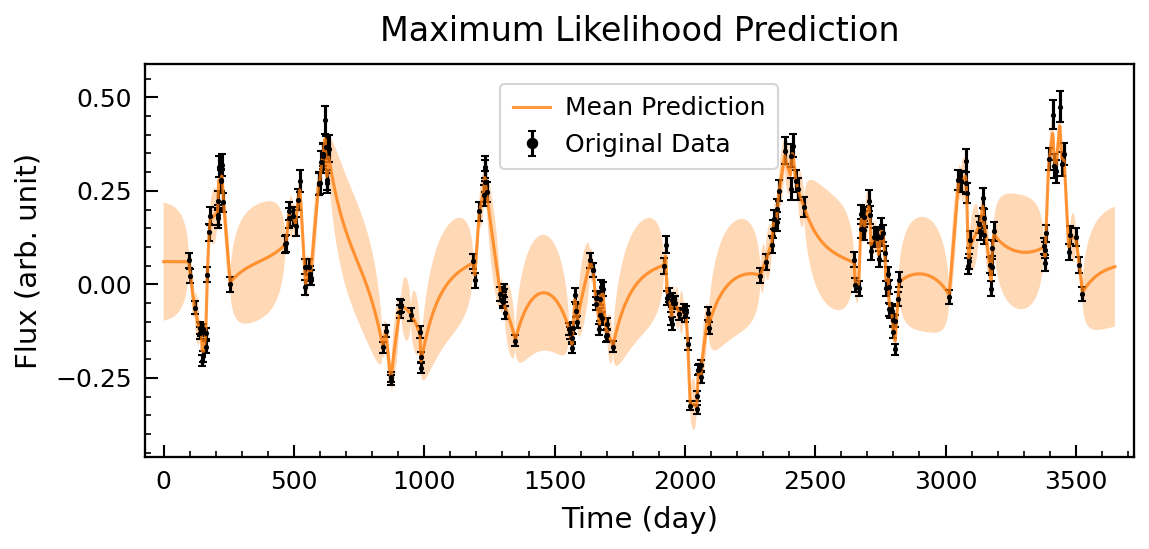

In [3]:
## plot predicted time series
t_pred = np.linspace(0, 365*10, 2000)
best_ar = np.array(1/best_fit[1:])
best_ma = np.array([DRW_kernel.perturb_amp(np.log(best_fit[0]), np.log(best_fit[1]))])
plot_pred_lc(t, y, yerr, best_ar, best_ma, t_pred)

/Users/weixiang/Projects/EzTao/src/eztao/viz/mpl_viz.py:70: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = mpl.colors.DivergingNorm(


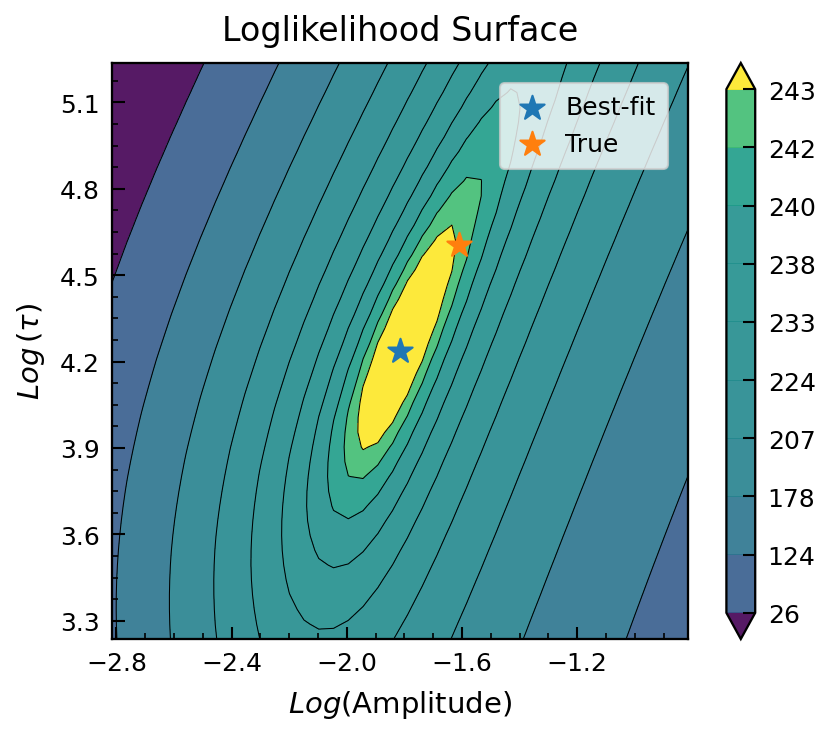

In [4]:
## plot log likelihood surface
from eztao.ts import neg_param_ll
from celerite import GP

gp = GP(DRW_kernel, mean=np.median(y))
plot_drw_ll(t, y, yerr, best_fit, gp, neg_param_ll, true_params=[amp, tau])

### 2. 2nd Order Statistics
Given a valid CARMA kernel, you can generate 2nd order statistics at a range of timescales/frequencies. In this section, we will use a DHO/CARMA(2,1) model for demonstration. 
- PSD: Power spectrum density
- ACF: Auto-correlation function
- SF: Structure function

In [5]:
from eztao.carma import CARMA_term
from eztao.carma import carma_acf, carma_psd, carma_sf

In [6]:
ar = np.array([0.04, 0.0027941])
ma = np.array([0.004672, 0.0257])

psd = carma_psd(ar, ma)
acf = carma_acf(ar, ma)
sf = carma_sf(ar, ma)

In [7]:
t = np.logspace(-1, 2.5, 1000)
t = np.insert(t, 0, 0)
freq = np.logspace(-5, 2)

##### Next, let's try to plot them

In [8]:
import matplotlib.pyplot as plt

/Users/weixiang/Projects/EzTao/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/weixiang/Projects/EzTao/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


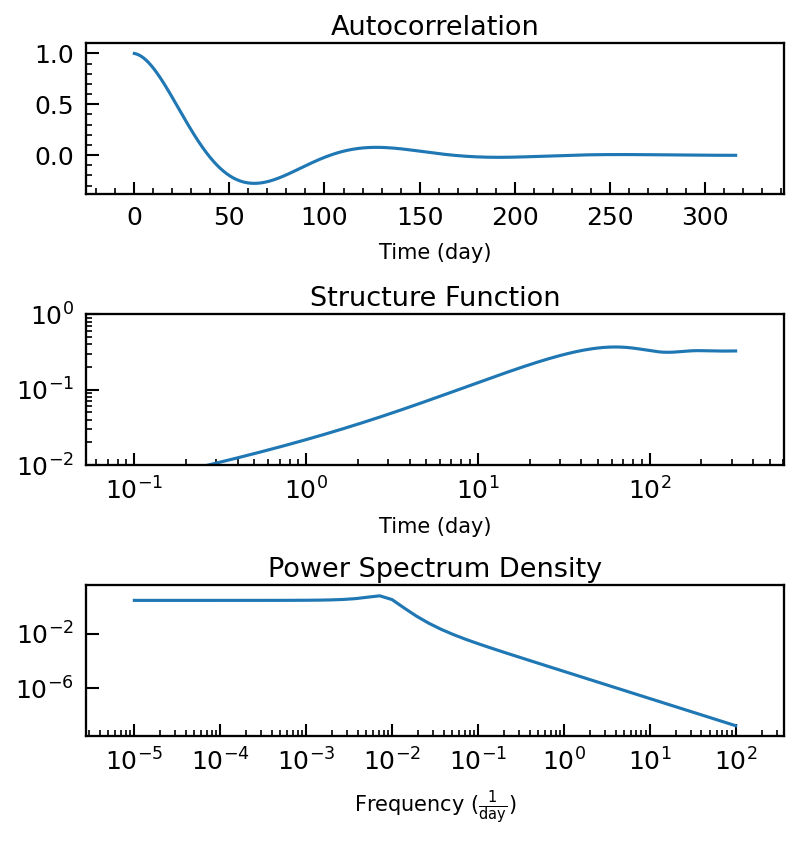

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(6, 6), dpi=150)

ax[0].plot(t, acf(t))
ax[0].set_xlabel('Time (day)', size=10)
ax[0].set_title('Autocorrelation', size=13, pad=4)

ax[1].plot(t, sf(t))
ax[1].set_xlabel('Time (day)', size=10)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim((10e-3, 1))
ax[1].set_title('Structure Function', size=13, pad=4)

ax[2].plot(freq, psd(freq))
ax[2].set_xlabel(r'Frequency ($\mathrm{\frac{1}{day}}$)', size=10)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
# ax[1].set_ylim((10e-3, 1))
ax[2].set_title('Power Spectrum Density', size=13, pad=4)

fig.subplots_adjust(hspace=0.8)

There are more useful functions offered in the `carma.model_utils` modules for you too look at.